In [1]:
!pip install mysql
!pip install SQLAlchemy

In [2]:
import mysql.connector
import pymysql
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Importing the data from mysql database
username = "root"
password = "8888888"
host = "localhost"
port = 3306
database = "banking"

# Create the connection string
connection_string = f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}"
engine = create_engine(connection_string)

# Test with a simple query
query = "SELECT * from banking.customer"
df = pd.read_sql(query, engine)

engine.dispose()

In [4]:
df.head()

,Client_ID,Name,Age,Location_ID,Joined_Bank,Banking_Contact,Nationality,Occupation,Fee_Structure,Loyalty_Classification,...,Bank_Deposits,Checking_Accounts,Saving_Accounts,Foreign_Currency_Account,Business_Lending,Properties_Owned,Risk_Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485830.0,603618.0,607332.0,12250.0,1134480.0,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,10-12-2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641483.0,229521.0,344635.0,61162.3,2000530.0,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033400.0,652675.0,203054.0,79071.8,548138.0,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,...,1048160.0,1048160.0,234685.0,57513.6,1148400.0,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487783.0,446644.0,128351.0,30012.1,1674410.0,0,3,1,2,5


In [5]:
df.shape

(3000, 25)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Client_ID                 3000 non-null   object 
 1   Name                      3000 non-null   object 
 2   Age                       3000 non-null   int64  
 3   Location_ID               3000 non-null   int64  
 4   Joined_Bank               3000 non-null   object 
 5   Banking_Contact           3000 non-null   object 
 6   Nationality               3000 non-null   object 
 7   Occupation                3000 non-null   object 
 8   Fee_Structure             3000 non-null   object 
 9   Loyalty_Classification    3000 non-null   object 
 10  Estimated_Income          3000 non-null   float64
 11  Superannuation_Savings    3000 non-null   float64
 12  Amount_of_Credit_Cards    3000 non-null   int64  
 13  Credit_Card_Balance       3000 non-null   float64
 14  Bank_Loa

In [7]:
df.describe()

,Age,Location_ID,Estimated_Income,Superannuation_Savings,Amount_of_Credit_Cards,Credit_Card_Balance,Bank_Loans,Bank_Deposits,Checking_Accounts,Saving_Accounts,Foreign_Currency_Account,Business_Lending,Properties_Owned,Risk_Weighting,BRId,GenderId,IAId
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,51.039667,21563.323000,171305.035633,25531.599397,1.463667,3176.207017,5.913862e+05,6.715602e+05,3.210930e+05,2.329083e+05,29883.530057,8.667598e+05,1.518667,2.249333,2.559333,1.504000,10.425333
std,19.854760,12462.273017,111935.813090,16259.950820,0.676387,2497.094945,4.575571e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.922239,6.412303e+05,1.102145,1.131191,1.007713,0.500067,5.988242
min,17.000000,12.000000,15919.500000,1482.030000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,10803.500000,82906.625000,12513.775000,1.000000,1236.630000,2.396280e+05,2.044005e+05,1.199475e+05,7.479440e+04,11916.575000,3.748248e+05,1.000000,1.000000,2.000000,1.000000,5.000000
50%,51.000000,21129.500000,142313.500000,22357.350000,1.000000,2560.805000,4.797935e+05,4.633160e+05,2.428160e+05,1.640870e+05,24341.200000,7.113150e+05,2.000000,2.000000,3.000000,2.000000,10.000000
75%,69.000000,32054.500000,242290.500000,35464.750000,2.000000,4522.632500,8.258128e+05,9.427545e+05,4.348748e+05,3.155750e+05,41966.350000,1.185110e+06,2.000000,3.000000,3.000000,2.000000,15.000000
max,85.000000,43369.000000,522330.000000,75963.900000,3.000000,13992.000000,2.667560e+06,3.890600e+06,1.969920e+06,1.724120e+06,124705.000000,3.825960e+06,3.000000,5.000000,4.000000,2.000000,22.000000


## Checking for null values

In [8]:
df.isnull().sum()

Client_ID                   0
Name                        0
Age                         0
Location_ID                 0
Joined_Bank                 0
Banking_Contact             0
Nationality                 0
Occupation                  0
Fee_Structure               0
Loyalty_Classification      0
Estimated_Income            0
Superannuation_Savings      0
Amount_of_Credit_Cards      0
Credit_Card_Balance         0
Bank_Loans                  0
Bank_Deposits               0
Checking_Accounts           0
Saving_Accounts             0
Foreign_Currency_Account    0
Business_Lending            0
Properties_Owned            0
Risk_Weighting              0
BRId                        0
GenderId                    0
IAId                        0
dtype: int64

## Duplicates

In [9]:
# Check for duplicate rows in the dataset
df.duplicated().sum()
df=df.drop_duplicates()

<Axes: xlabel='Age', ylabel='Count'>

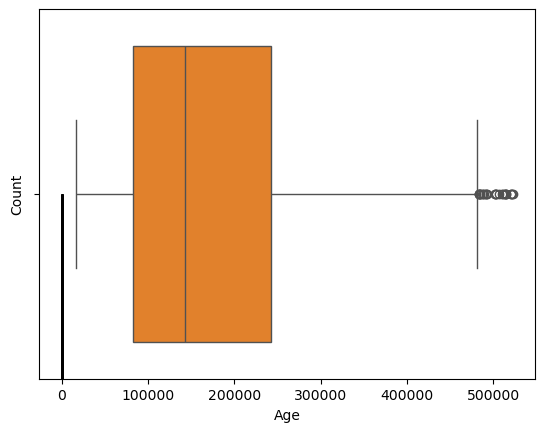

In [10]:
sns.histplot(x=df['Age'],bins=20)
sns.boxplot(x=df['Estimated_Income'])

In [11]:
labels = ['Low','Medium','High']
inc = pd.cut(df['Estimated_Income'], bins =3,labels = labels)
inc_bins = inc.value_counts()

<Axes: xlabel='Estimated_Income'>

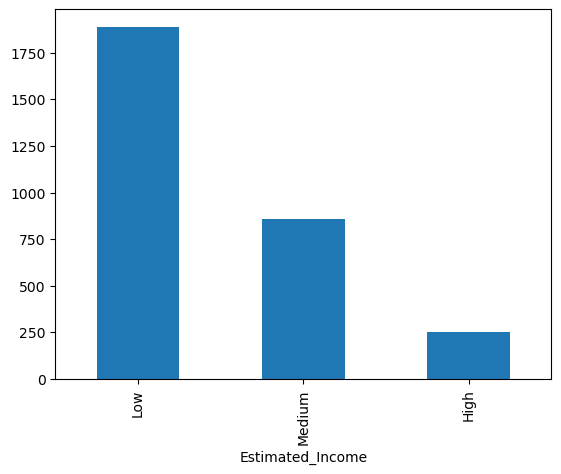

In [12]:
inc_bins.plot(kind= 'bar')

## Examine the categorical Columns

In [13]:
categorical_columns = ['Nationality','Loyalty_Classification', 'Amount_of_Credit_Cards','Risk_Weighting', 'BRId', 'GenderId', 'IAId']

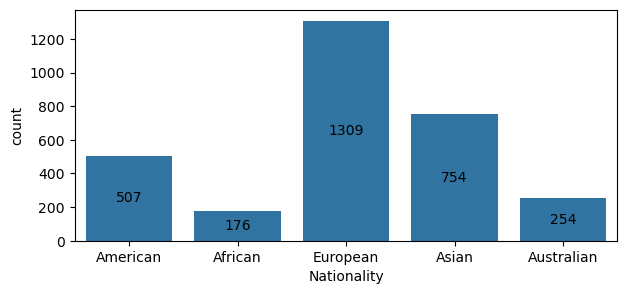

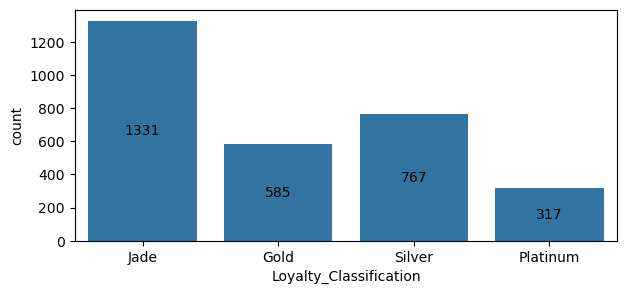

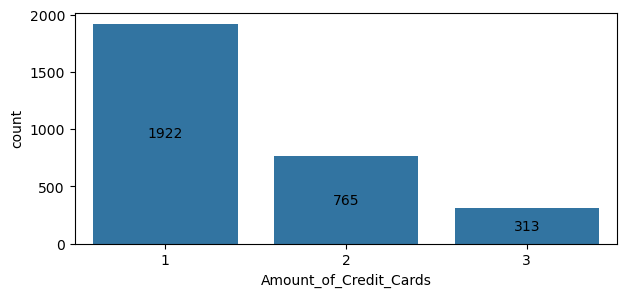

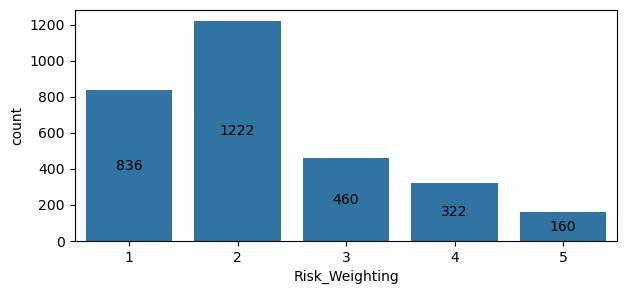

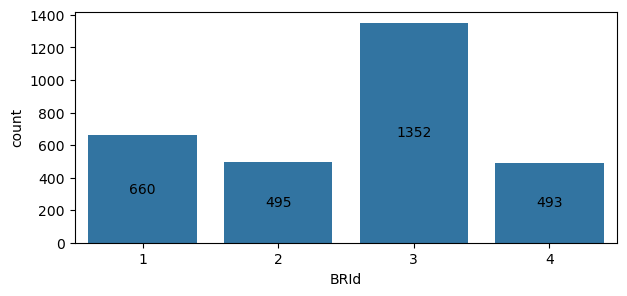

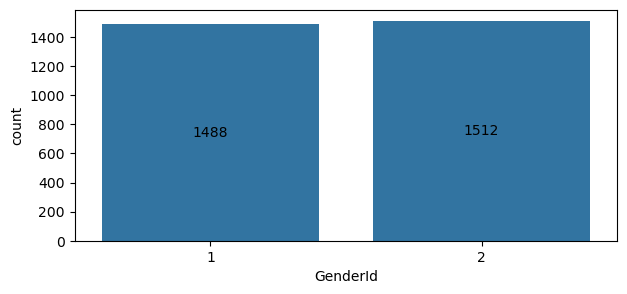

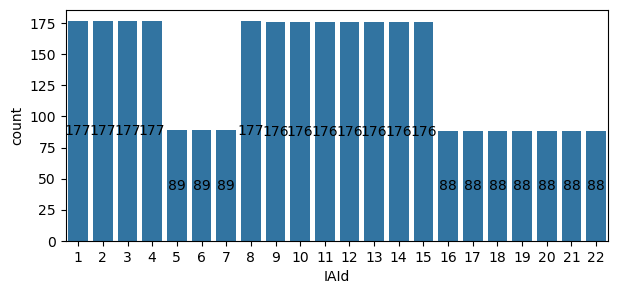

In [14]:
# Data visualization
for i, column in enumerate(df[categorical_columns]):
    plt.figure(i,figsize =(7,3))
    ax =sns.countplot(data = df,x=column)
    ax.bar_label(ax.containers[0], padding=0,label_type ='center')

In [15]:
numerical_columns =['Estimated_Income', 'Superannuation_Savings','Credit_Card_Balance', 'Bank_Loans',
       'Bank_Deposits', 'Checking_Accounts', 'Saving_Accounts',
       'Foreign_Currency_Account', 'Business_Lending','Properties_Owned']

## Single variable Analysis

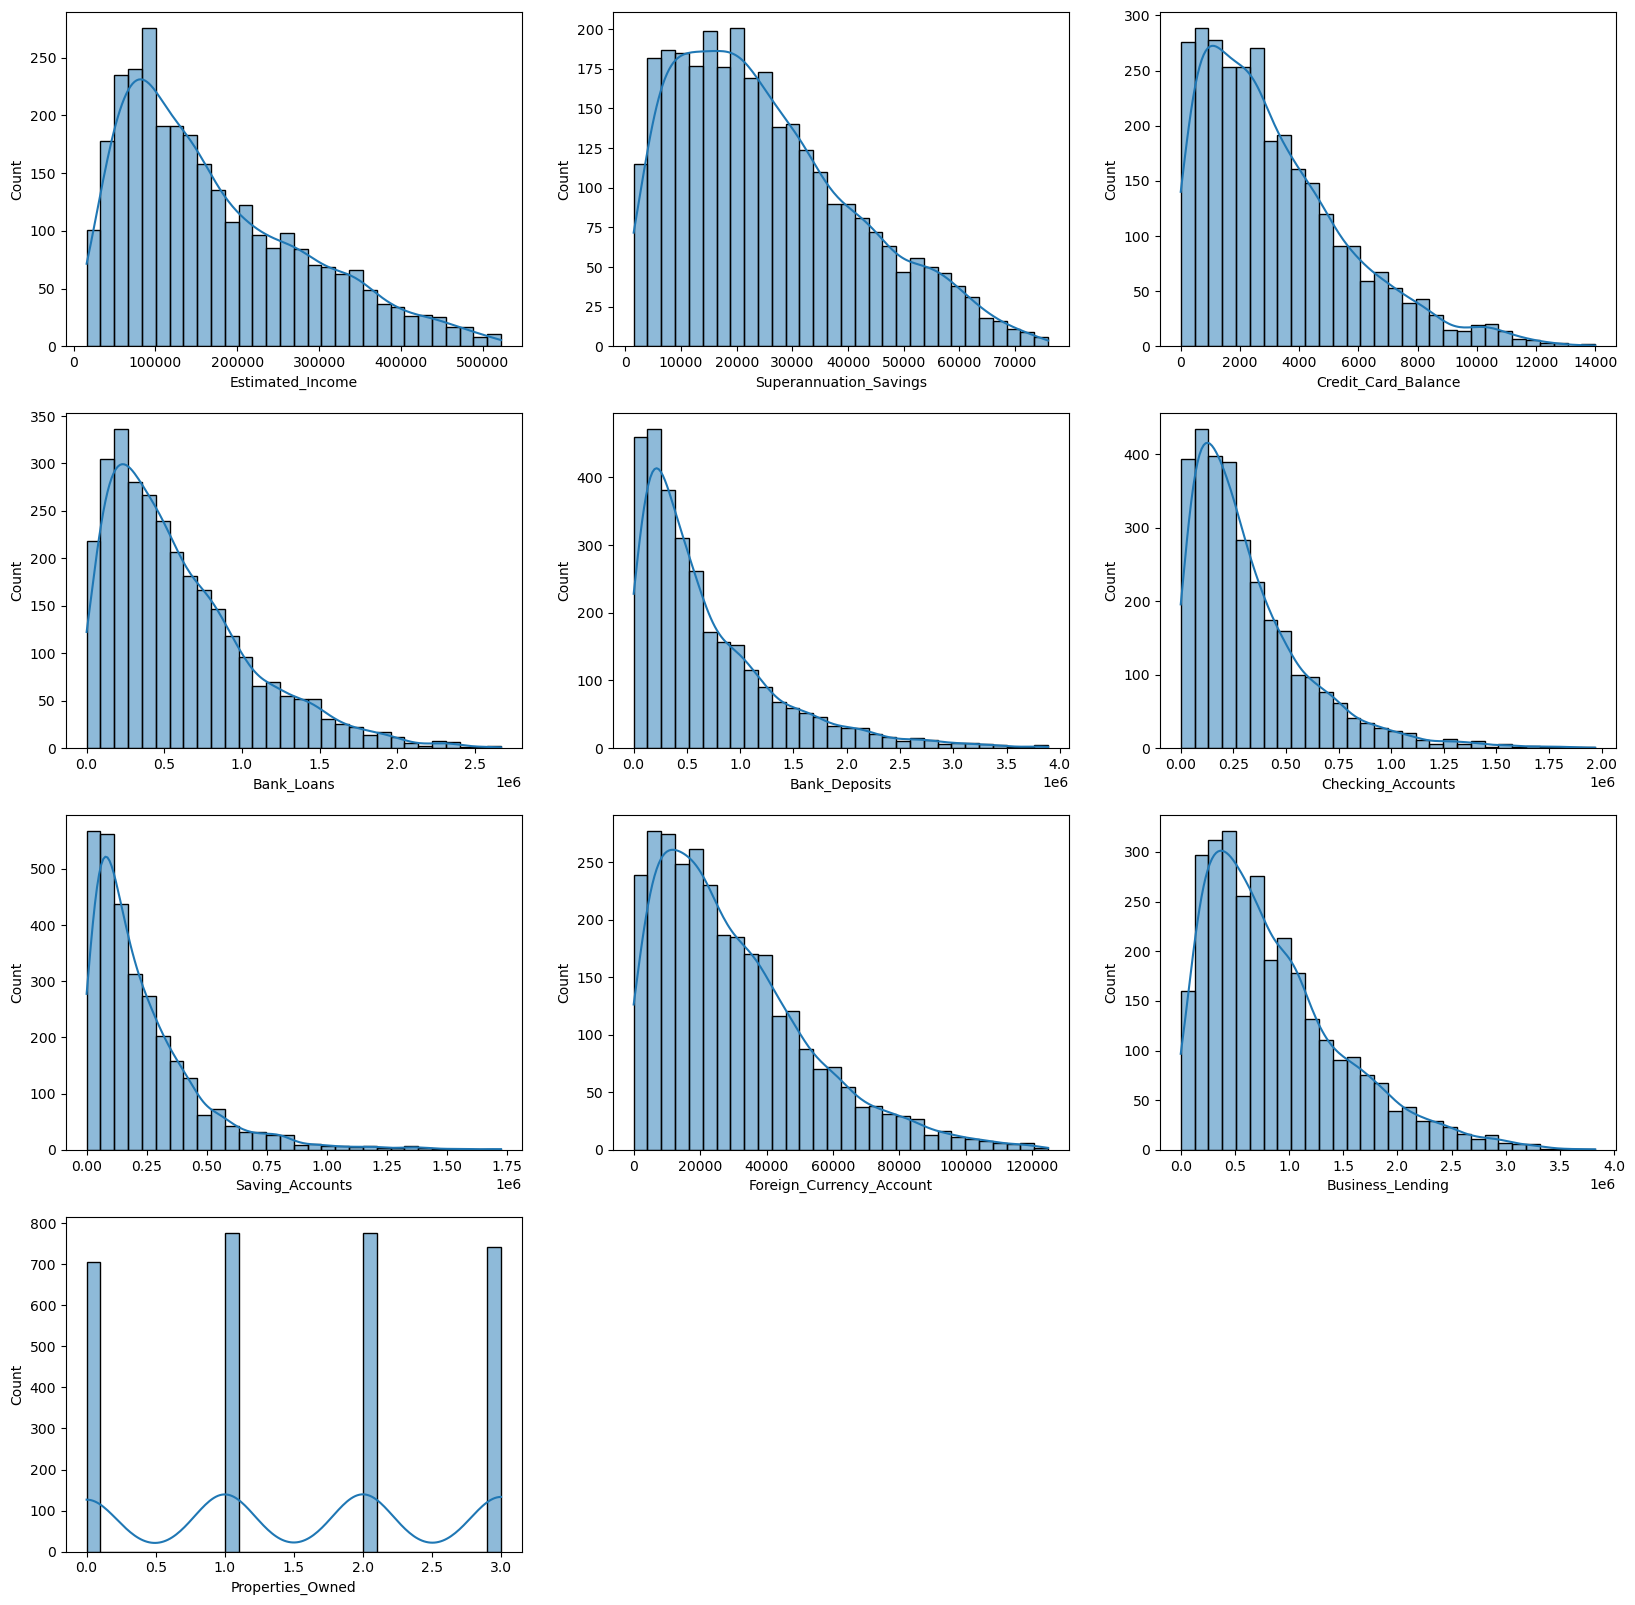

In [16]:
# Data visualization
plt.figure(figsize=(20,20))
for i, p in enumerate(numerical_columns):
    
    plt.subplot(4,3,i+1)
    sns.histplot(data=df,x=p, bins=30,kde = True)


## Bivarient Anlaysis

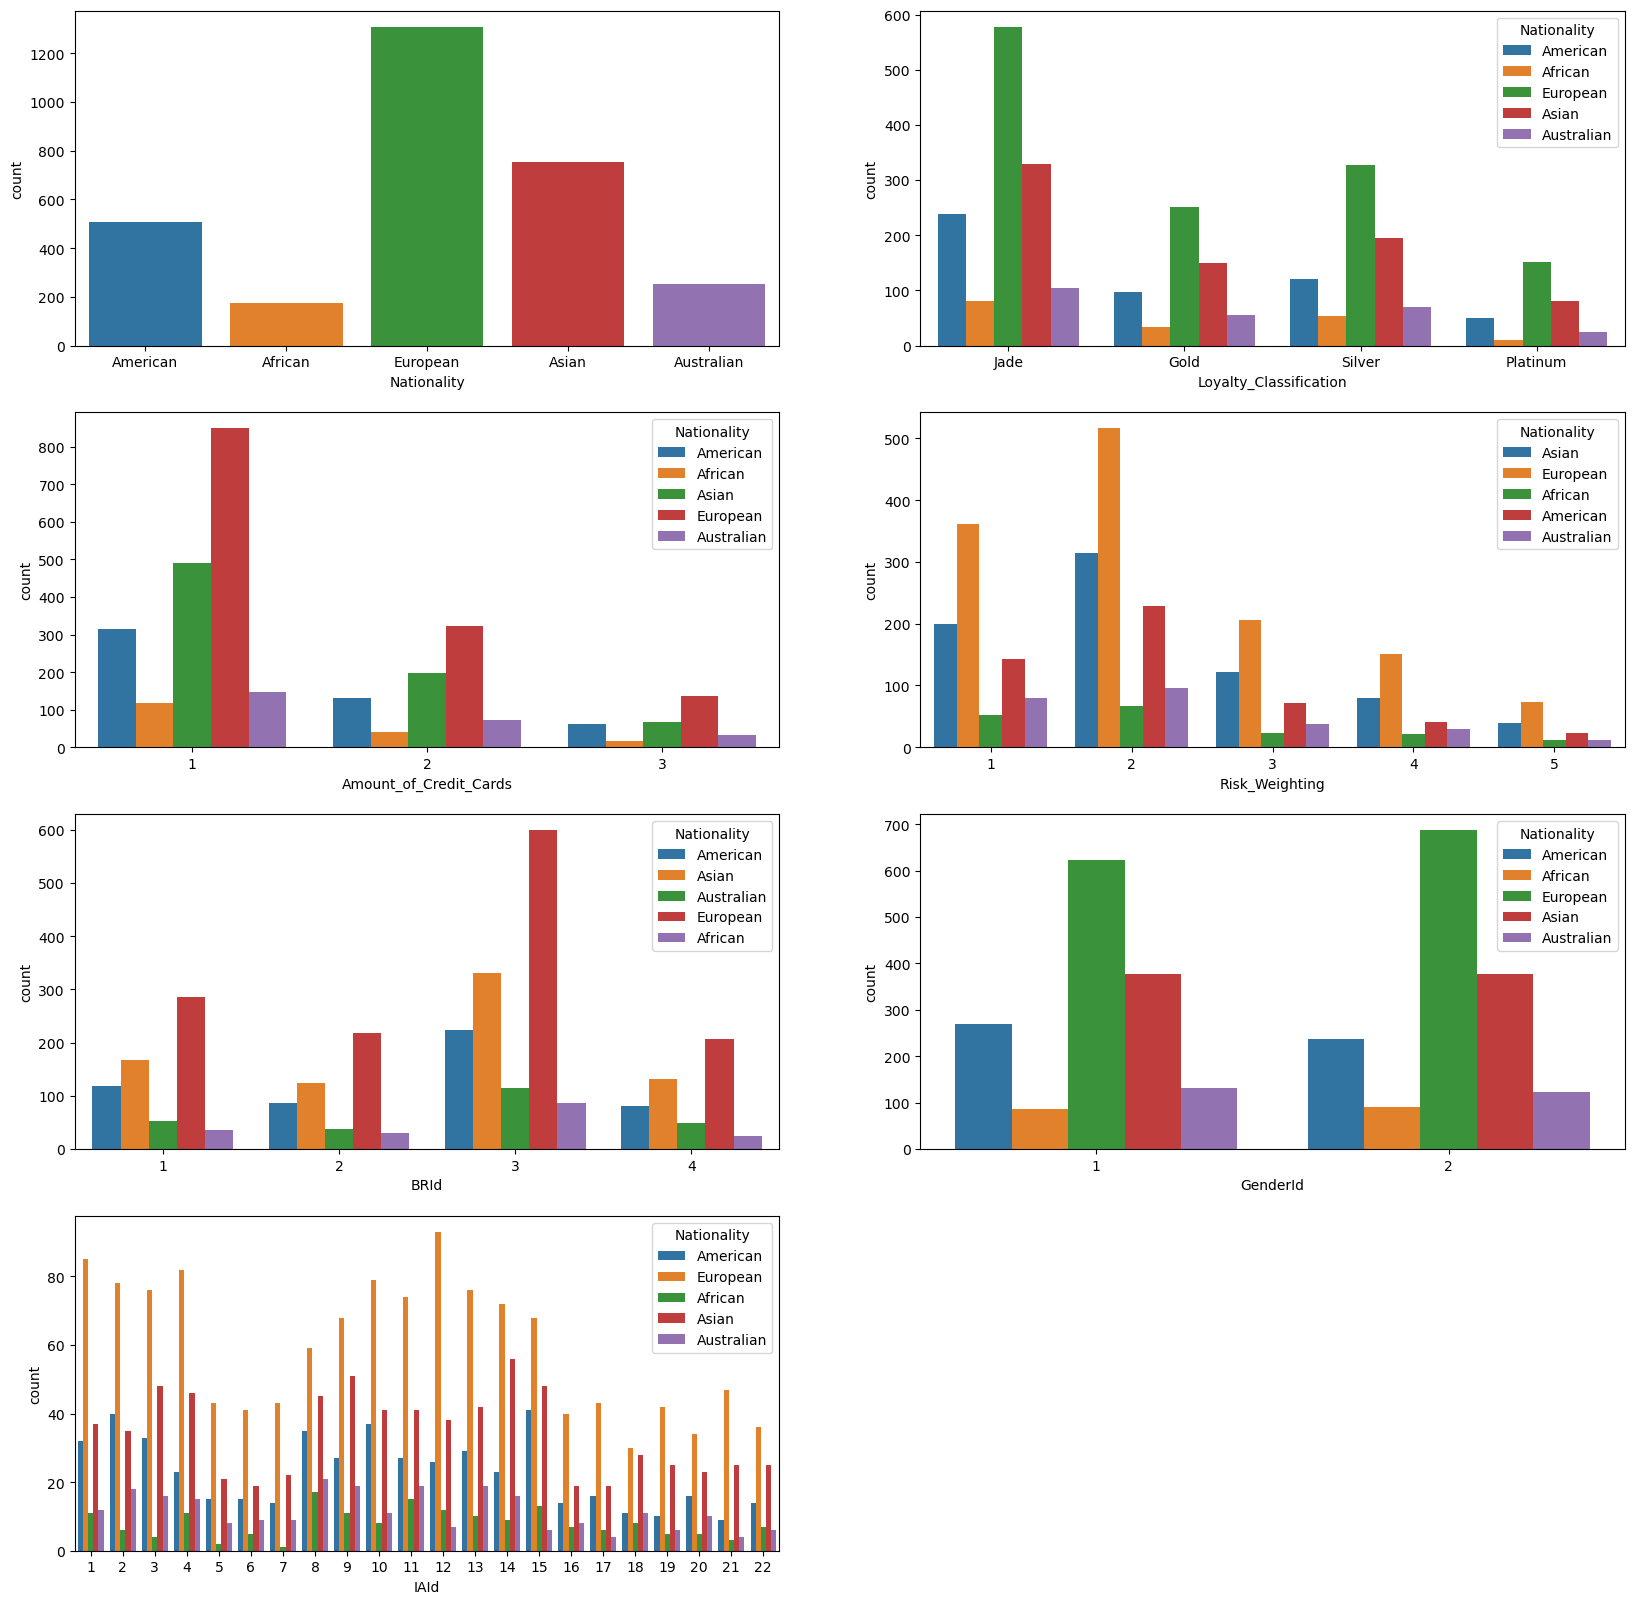

In [17]:
plt.figure(figsize =(20,20))
for i, column in enumerate(df[categorical_columns]):
    plt.subplot(4,2,i+1)
    sns.countplot(data = df,x=column,hue = 'Nationality')


## Corelation 

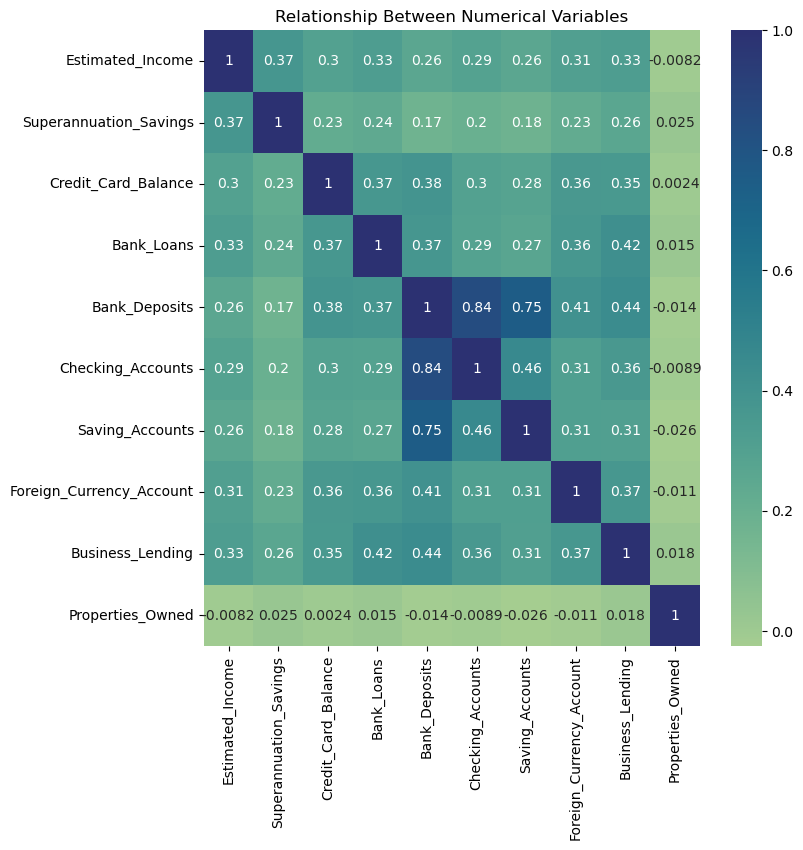

In [18]:
corelation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corelation_matrix,annot= True, cmap ='crest')
plt.title(label ='Relationship Between Numerical Variables')
plt.show()